In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot
from sklearn.feature_selection import VarianceThreshold
plt.style.use('fivethirtyeight')
from scipy import stats

In [2]:
train = pd.read_csv('G:/Desktop/datasets/flight-delays-spring-2018/flight_delays_train.csv')
test = pd.read_csv('G:/Desktop/datasets/flight-delays-spring-2018/flight_delays_test.csv')
train.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [143]:
train.shape, test.shape

((100000, 9), (100000, 8))

In [144]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
Month                100000 non-null object
DayofMonth           100000 non-null object
DayOfWeek            100000 non-null object
DepTime              100000 non-null int64
UniqueCarrier        100000 non-null object
Origin               100000 non-null object
Dest                 100000 non-null object
Distance             100000 non-null int64
dep_delayed_15min    100000 non-null object
dtypes: int64(2), object(7)
memory usage: 41.8 MB


In [145]:
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
Month            100000 non-null object
DayofMonth       100000 non-null object
DayOfWeek        100000 non-null object
DepTime          100000 non-null int64
UniqueCarrier    100000 non-null object
Origin           100000 non-null object
Dest             100000 non-null object
Distance         100000 non-null int64
dtypes: int64(2), object(6)
memory usage: 35.9 MB


# concat two datasets

In [146]:
data = pd.concat([train,test])

C:\Users\Dindar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 99999
Data columns (total 9 columns):
DayOfWeek            200000 non-null object
DayofMonth           200000 non-null object
DepTime              200000 non-null int64
Dest                 200000 non-null object
Distance             200000 non-null int64
Month                200000 non-null object
Origin               200000 non-null object
UniqueCarrier        200000 non-null object
dep_delayed_15min    100000 non-null object
dtypes: int64(2), object(7)
memory usage: 82.2 MB


In [8]:
data.shape

(200000, 9)

In [147]:
data.columns

Index(['DayOfWeek', 'DayofMonth', 'DepTime', 'Dest', 'Distance', 'Month',
       'Origin', 'UniqueCarrier', 'dep_delayed_15min'],
      dtype='object')

In [10]:
data.dtypes

DayOfWeek            object
DayofMonth           object
DepTime               int64
Dest                 object
Distance              int64
Month                object
Origin               object
UniqueCarrier        object
dep_delayed_15min    object
dtype: object

In [11]:
data.describe()

,DepTime,Distance
count,200000.000000,200000.000000
mean,1340.230240,726.263635
std,478.471381,568.955768
min,1.000000,30.000000
25%,930.000000,319.000000
50%,1329.000000,575.000000
75%,1733.000000,954.000000
max,2534.000000,4962.000000


In [12]:
data.isnull().sum()

DayOfWeek                 0
DayofMonth                0
DepTime                   0
Dest                      0
Distance                  0
Month                     0
Origin                    0
UniqueCarrier             0
dep_delayed_15min    100000
dtype: int64

In [148]:
data = data.fillna(np.nan)

# dep_delayed_15min


In [149]:
data['dep_delayed_15min'].isnull().sum()

100000

In [14]:
data['dep_delayed_15min'].unique()

array(['N', 'Y', nan], dtype=object)

In [150]:
d = {'N':0, 'Y':1}
data['dep_delayed_15min'] = data['dep_delayed_15min'].map(d)

In [16]:
data['dep_delayed_15min'].value_counts(normalize=True)

0.0    0.80956
1.0    0.19044
Name: dep_delayed_15min, dtype: float64

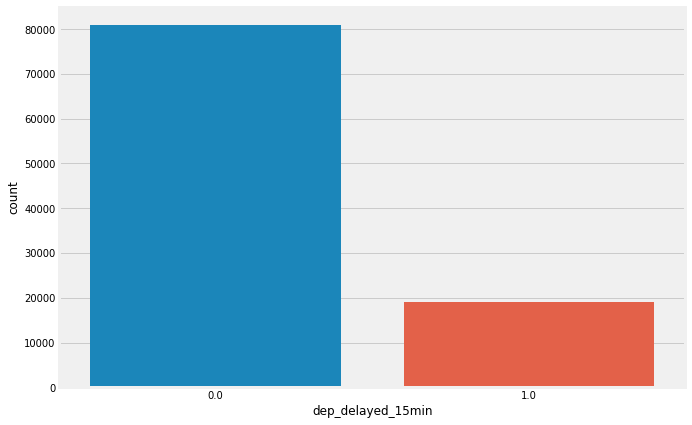

In [17]:
plt.figure(figsize=(10, 7))
sns.countplot(data['dep_delayed_15min'])

# day of week

In [42]:
data['DayOfWeek'].head()

0    7
1    3
2    5
3    6
4    6
Name: DayOfWeek, dtype: int64

In [23]:
data['DayOfWeek'].dtypes

dtype('int64')

In [29]:
data['DayOfWeek'].isnull().any()

False

In [16]:
data['DayOfWeek'].unique()

array(['c-7', 'c-3', 'c-5', 'c-6', 'c-4', 'c-2', 'c-1'], dtype=object)

In [18]:
d = {'c-7':7, 'c-3':3, 'c-5':5, 'c-6':6, 'c-4':4, 'c-2':2, 'c-1':1}
data['DayOfWeek'] = data['DayOfWeek'].map(d)

In [24]:
data['DayOfWeek'].dtypes

dtype('int64')

In [22]:
data['DayOfWeek'].value_counts()

1    29586
5    29540
4    29538
3    29081
2    28942
7    27988
6    25325
Name: DayOfWeek, dtype: int64

In [19]:
pmf = thinkstats2.Pmf(data['DayOfWeek'])

In [15]:
pmf

Pmf({1: 0.14793, 5: 0.14770000000000003, 4: 0.14769000000000002, 3: 0.145405, 2: 0.14471, 7: 0.13994, 6: 0.12662500000000002})

No handles with labels found to put in legend.


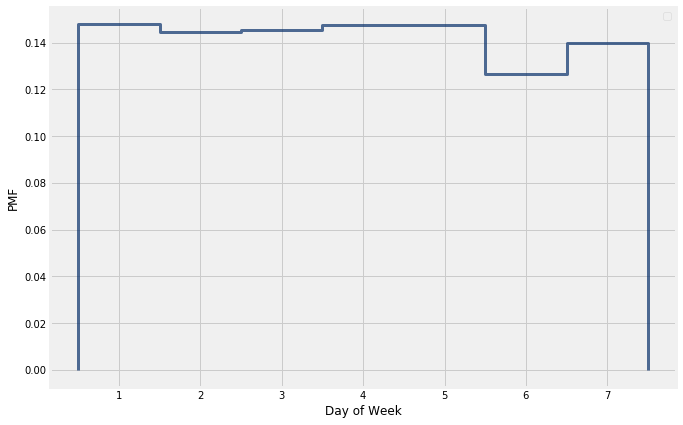

<Figure size 576x432 with 0 Axes>

In [21]:
plt.figure(figsize=(10, 7))
thinkplot.Pmf(pmf)
thinkplot.Show(xlabel='Day of Week', ylabel='PMF')

In [19]:
data['week_sin'] = np.sin(data['DayOfWeek']*(2.*np.pi/7))
data['week_cos'] = np.cos(data['DayOfWeek']*(2.*np.pi/7))

In [55]:
yes_pmf = thinkstats2.Pmf(data[data['dep_delayed_15min'] == 1.0]['DayOfWeek'], label='1')
no_pmf = thinkstats2.Pmf(data[data['dep_delayed_15min'] == 0.0]['DayOfWeek'],  label='0')

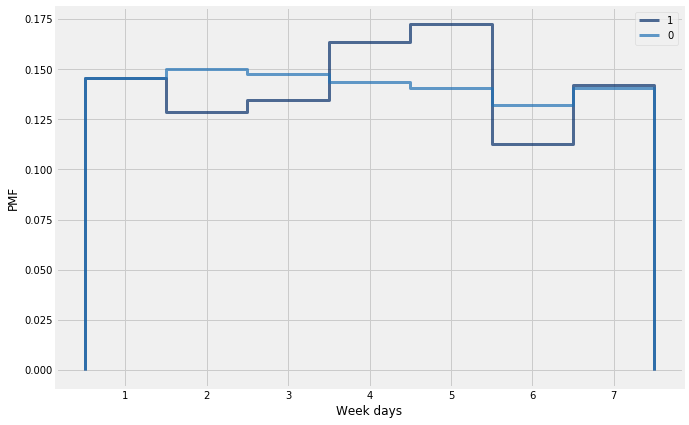

<Figure size 576x432 with 0 Axes>

In [56]:
plt.figure(figsize=(10, 7))
thinkplot.Pmfs([yes_pmf, no_pmf])
thinkplot.Show(xlabel='Week days', ylabel='PMF')

C:\Users\Dindar\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Dindar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 864x648 with 0 Axes>

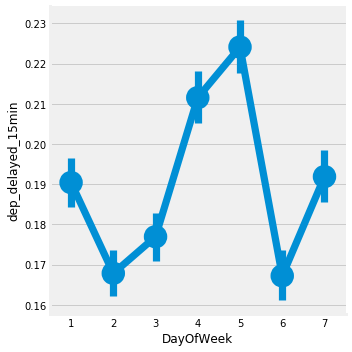

In [20]:
plt.figure(figsize=(12, 9))
sns.factorplot('DayOfWeek', 'dep_delayed_15min', data=data)

# drop week

In [11]:
data.drop('DayOfWeek', axis=1, inplace=True)

# Month

In [20]:
data['Month'].head()

0     c-8
1     c-4
2     c-9
3    c-11
4    c-10
Name: Month, dtype: object

In [21]:
data['Month'].isnull().any()

False

In [22]:
data['Month'].unique()

array(['c-8', 'c-4', 'c-9', 'c-11', 'c-10', 'c-1', 'c-7', 'c-6', 'c-5',
       'c-3', 'c-12', 'c-2'], dtype=object)

In [23]:
d = {'c-8':8, 'c-4':4, 'c-9':9, 'c-11':11, 'c-10':10, 'c-1':1, 'c-7':7, 'c-6':6, 'c-5':5,
       'c-3':3, 'c-12':12, 'c-2':2}
data['Month'] = data['Month'].map(d)

In [26]:
data['Month'].value_counts(normalize=True).sort_index()

1     0.081875
2     0.074060
3     0.085730
4     0.083845
5     0.085445
6     0.083780
7     0.087310
8     0.088635
9     0.081185
10    0.084290
11    0.081715
12    0.082130
Name: Month, dtype: float64

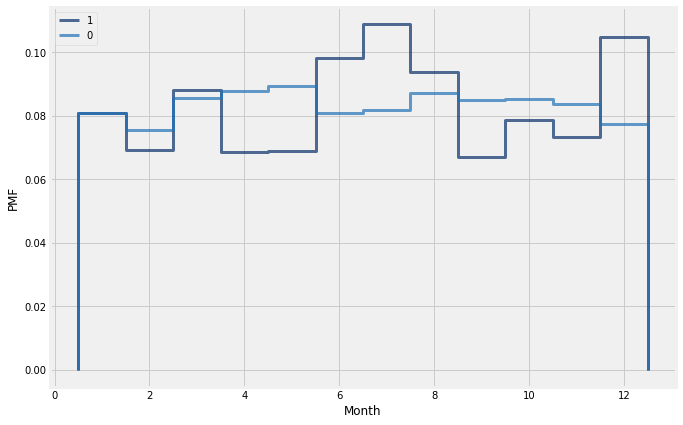

<Figure size 576x432 with 0 Axes>

In [24]:
yes_pmf = thinkstats2.Pmf(data[data['dep_delayed_15min'] == 1.0]['Month'], label='1')
no_pmf = thinkstats2.Pmf(data[data['dep_delayed_15min'] == 0.0]['Month'],  label='0')
plt.figure(figsize=(10, 7))
thinkplot.Pmfs([yes_pmf, no_pmf])
thinkplot.Show(xlabel='Month', ylabel='PMF')

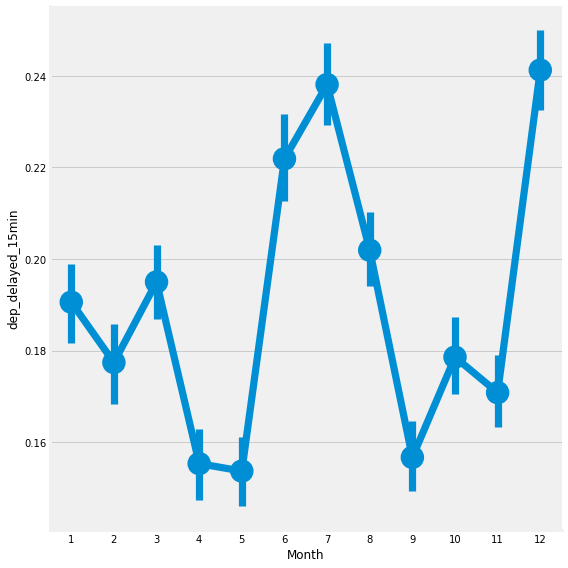

In [30]:
sns.factorplot('Month', 'dep_delayed_15min', data=data, size=8)

In [31]:
data['month_sin'] = np.sin((data['Month'])*(2.*np.pi/12))
data['month_cos'] = np.cos((data['Month'])*(2.*np.pi/12))

In [32]:
data.drop('Month', axis=1, inplace=True)

# day of month

In [41]:
data['DayofMonth'].head()

0    c-21
1    c-20
2     c-2
3    c-25
4     c-7
Name: DayofMonth, dtype: object

In [40]:
data['DayofMonth'].dtypes

dtype('O')

In [43]:
data['DayofMonth'].isnull().any()

False

In [44]:
data['DayofMonth'].unique()

array(['c-21', 'c-20', 'c-2', 'c-25', 'c-7', 'c-3', 'c-27', 'c-29',
       'c-28', 'c-5', 'c-6', 'c-10', 'c-19', 'c-26', 'c-14', 'c-22',
       'c-9', 'c-31', 'c-4', 'c-16', 'c-18', 'c-30', 'c-1', 'c-24',
       'c-15', 'c-17', 'c-8', 'c-12', 'c-13', 'c-11', 'c-23'],
      dtype=object)

In [45]:
d = {'c-21':21, 'c-20':20, 'c-2':2, 'c-25':25, 'c-7':7, 'c-3':3, 'c-27':27, 'c-29':29,
       'c-28':28, 'c-5':5, 'c-6':6, 'c-10':10, 'c-19':19, 'c-26':26, 'c-14':14, 'c-22':22,
       'c-9':9, 'c-31':31, 'c-4':4, 'c-16':16, 'c-18':18, 'c-30':30, 'c-1':1, 'c-24':24,
       'c-15':15, 'c-17':17, 'c-8':8, 'c-12':12, 'c-13':13, 'c-11':11, 'c-23':23}
data['DayofMonth'] = data['DayofMonth'].map(d)

In [48]:
data['DayofMonth'].value_counts(normalize=True).sort_index()

1     0.033225
2     0.032810
3     0.032335
4     0.032545
5     0.033575
6     0.033280
7     0.033085
8     0.033035
9     0.033085
10    0.032880
11    0.032460
12    0.032695
13    0.032665
14    0.033625
15    0.032485
16    0.032965
17    0.032495
18    0.032715
19    0.033650
20    0.033615
21    0.032545
22    0.032750
23    0.032430
24    0.032460
25    0.033330
26    0.033050
27    0.032800
28    0.032765
29    0.029100
30    0.030125
31    0.019420
Name: DayofMonth, dtype: float64

In [50]:
pmf1 = thinkstats2.Pmf(data['DayofMonth'])

No handles with labels found to put in legend.


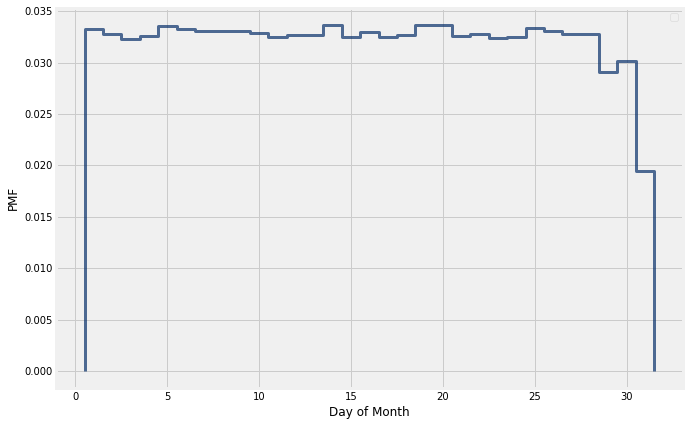

<Figure size 576x432 with 0 Axes>

In [51]:
plt.figure(figsize=(10, 7))
thinkplot.Pmf(pmf1)
thinkplot.Show(xlabel='Day of Month', ylabel='PMF')

In [52]:
yes_pmf = thinkstats2.Pmf(data[data['dep_delayed_15min'] == 1.0]['DayofMonth'], label='1')
no_pmf = thinkstats2.Pmf(data[data['dep_delayed_15min'] == 0.0]['DayofMonth'],  label='0')

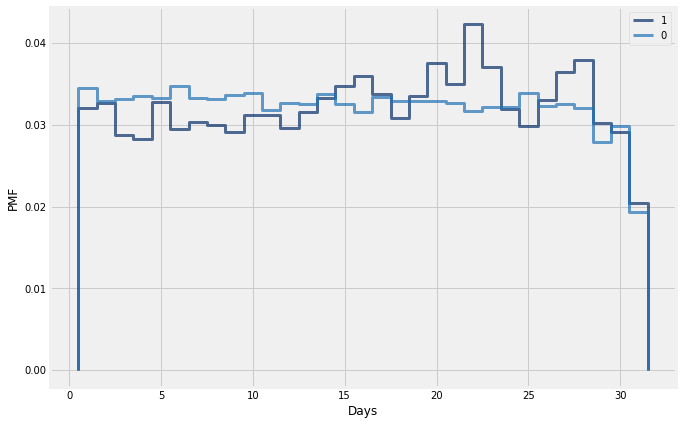

<Figure size 576x432 with 0 Axes>

In [53]:
plt.figure(figsize=(10, 7))
thinkplot.Pmfs([yes_pmf, no_pmf])
thinkplot.Show(xlabel='Days', ylabel='PMF')

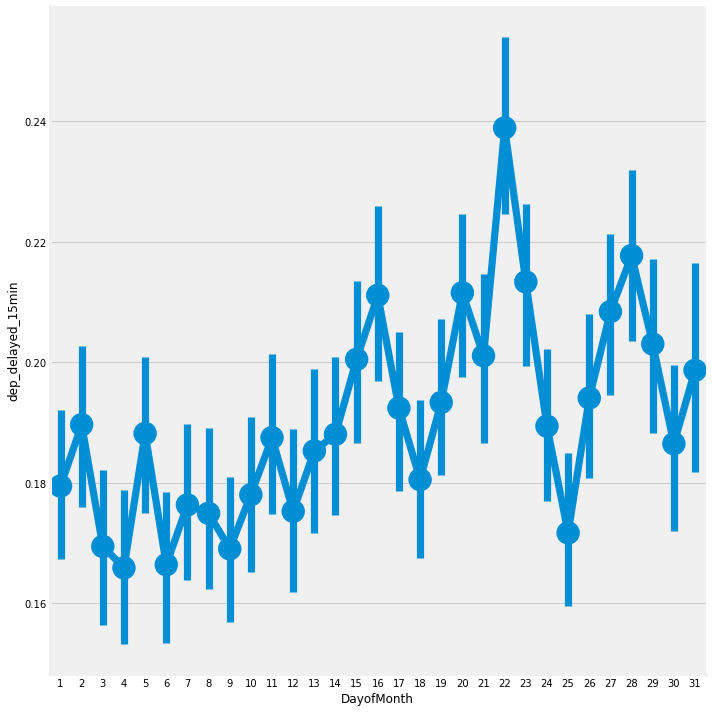

In [96]:
sns.factorplot('DayofMonth', 'dep_delayed_15min', data=data, size = 10)

In [60]:
data['day_sin'] = np.sin(data['DayofMonth']*(2.*np.pi/31))
data['day_cos'] = np.cos(data['DayofMonth']*(2.*np.pi/31))

In [14]:
data.drop('DayofMonth', axis=1, inplace=True)

# dep time

In [61]:
data['DepTime'].head()

0    1934
1    1548
2    1422
3    1015
4    1828
Name: DepTime, dtype: int64

In [62]:
data['DepTime'].dtypes

dtype('int64')

In [63]:
data['DepTime'].describe()

count    200000.000000
mean       1340.230240
std         478.471381
min           1.000000
25%         930.000000
50%        1329.000000
75%        1733.000000
max        2534.000000
Name: DepTime, dtype: float64

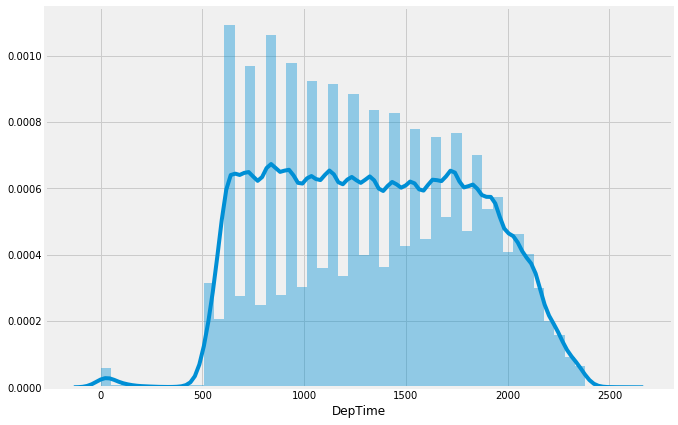

In [32]:
plt.figure(figsize=(10,7))
sns.distplot(data['DepTime'])

In [77]:
indexes = data[data['DepTime'] > 2360]['DepTime'].index

In [78]:
len(indexes)

46

In [79]:
d = data[(data['DepTime'] > 2361)&(data['DepTime'] < 2461)]

In [81]:
d1 = data[data['DepTime'] < 61]

In [88]:
d.shape[0], d1.shape[0]

(40, 646)

Text(0.5, 1.0, ' < 61')

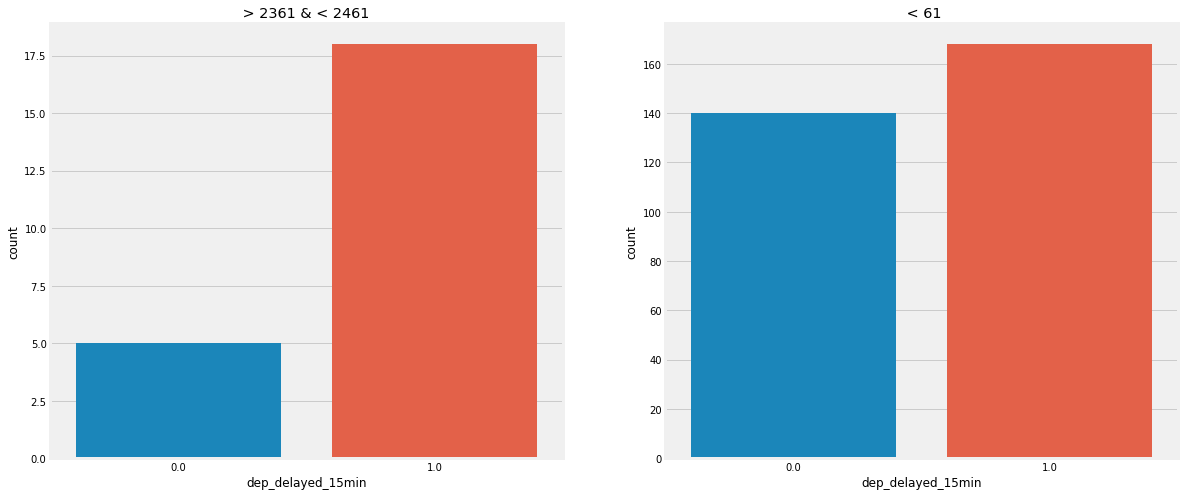

In [82]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot(d['dep_delayed_15min'], ax = ax[0])
sns.countplot(d1['dep_delayed_15min'], ax = ax[1])
ax[0].set_title(' > 2361 & < 2461 ')
ax[1].set_title(' < 61')

In [84]:
d2 = data[(data['DepTime'] > 2461)&(data['DepTime'] < 2561)]
d3 = data[(data['DepTime'] > 61)&(data['DepTime'] < 161)]

In [87]:
d2.shape[0], d3.shape[0]

(6, 154)

Text(0.5, 1.0, ' > 61 & < 161 ')

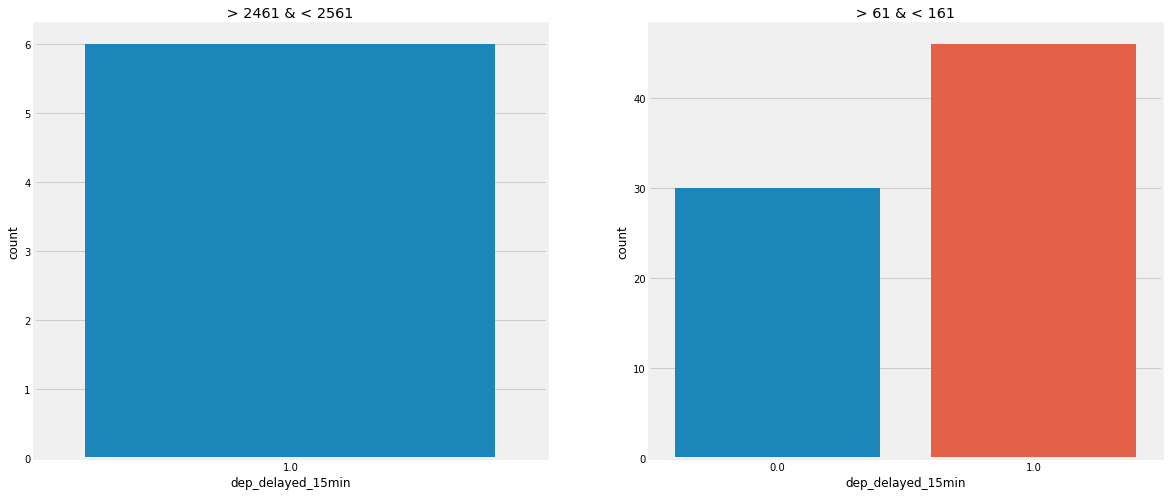

In [85]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot(d2['dep_delayed_15min'], ax = ax[0])
sns.countplot(d3['dep_delayed_15min'], ax = ax[1])
ax[0].set_title(' > 2461 & < 2561 ')
ax[1].set_title(' > 61 & < 161 ')

In [64]:
data.loc[(data['DepTime'] > 2361)&(data['DepTime'] < 2461),'DepTime'] = 59
data.loc[(data['DepTime'] > 2461)&(data['DepTime'] < 2561),'DepTime'] = 159

In [65]:
data['depTime']=0
data.loc[data['DepTime']<=61,'depTime']=1
data.loc[(data['DepTime']>61)&(data['DepTime']<=161),'depTime']=2
data.loc[(data['DepTime']>161)&(data['DepTime']<261),'depTime']=3
data.loc[(data['DepTime']>261)&(data['DepTime']<=361),'depTime']=4
data.loc[(data['DepTime']>361)&(data['DepTime']<=461),'depTime']=5
data.loc[(data['DepTime']>461)&(data['DepTime']<=561),'depTime']=6
data.loc[(data['DepTime']>561)&(data['DepTime']<=661),'depTime']=7
data.loc[(data['DepTime']>661)&(data['DepTime']<=761),'depTime']=8
data.loc[(data['DepTime']>761)&(data['DepTime']<=861),'depTime']=9
data.loc[(data['DepTime']>861)&(data['DepTime']<=961),'depTime']=10
data.loc[(data['DepTime']>961)&(data['DepTime']<=1061),'depTime']=11
data.loc[(data['DepTime']>1061)&(data['DepTime']<=1161),'depTime']=12
data.loc[(data['DepTime']>1161)&(data['DepTime']<=1261),'depTime']=13
data.loc[(data['DepTime']>1261)&(data['DepTime']<=1361),'depTime']=14
data.loc[(data['DepTime']>1361)&(data['DepTime']<=1461),'depTime']=15
data.loc[(data['DepTime']>1461)&(data['DepTime']<=1561),'depTime']=16
data.loc[(data['DepTime']>1561)&(data['DepTime']<=1661),'depTime']=17
data.loc[(data['DepTime']>1661)&(data['DepTime']<=1761),'depTime']=18
data.loc[(data['DepTime']>1761)&(data['DepTime']<=1861),'depTime']=19
data.loc[(data['DepTime']>1861)&(data['DepTime']<=1961),'depTime']=20
data.loc[(data['DepTime']>1961)&(data['DepTime']<=2061),'depTime']=21
data.loc[(data['DepTime']>2061)&(data['DepTime']<=2161),'depTime']=22
data.loc[(data['DepTime']>2161)&(data['DepTime']<=2261),'depTime']=23
data.loc[(data['DepTime']>2261)&(data['DepTime']<=2361),'depTime']=24

In [101]:
data['depTime'].value_counts().sort_index()

1       686
2       160
3        51
4        16
5        84
6      3522
7     12881
8     12628
9     13283
10    12722
11    12421
12    12923
13    12358
14    12524
15    12074
16    12199
17    12196
18    12975
19    11887
20    11256
21     8813
22     7124
23     3623
24     1594
Name: depTime, dtype: int64

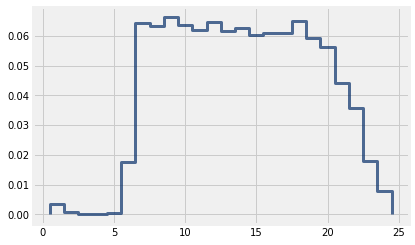

In [105]:
plt.figure(figsize=(10, 7))
pmf = thinkstats2.Pmf(data['depTime'])
thinkplot.Pmf(pmf)

In [122]:
data.groupby('depTime').sum()['dep_delayed_15min']

depTime
1      186.0
2       52.0
3       12.0
4        5.0
5        3.0
6       11.0
7      159.0
8      361.0
9      509.0
10     724.0
11     846.0
12     948.0
13    1093.0
14    1201.0
15    1183.0
16    1383.0
17    1429.0
18    1563.0
19    1709.0
20    1678.0
21    1491.0
22    1368.0
23     770.0
24     360.0
Name: dep_delayed_15min, dtype: float64

In [66]:
yes_pmf = thinkstats2.Pmf(data[data['dep_delayed_15min'] == 1.0]['depTime'], label='1')
no_pmf = thinkstats2.Pmf(data[data['dep_delayed_15min'] == 0.0]['depTime'],  label='0')

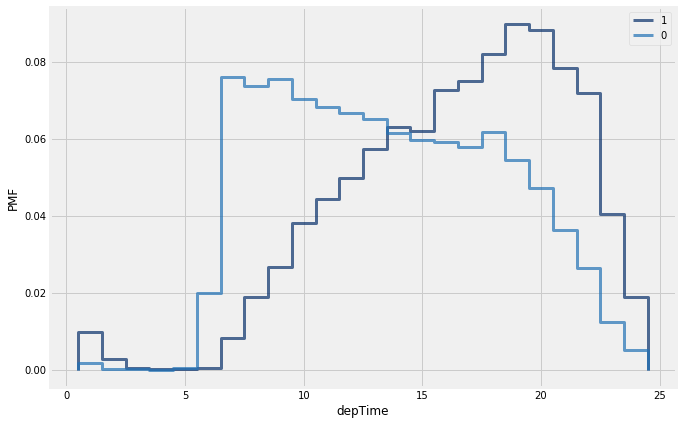

<Figure size 576x432 with 0 Axes>

In [67]:
plt.figure(figsize=(10, 7))
thinkplot.Pmfs([yes_pmf, no_pmf])
thinkplot.Show(xlabel='depTime', ylabel='PMF')

In [112]:
data.drop('DepTime', axis=1, inplace=True)

# dest, origin

In [151]:
data['Dest'].head(), data['Origin'].head()

(0    DFW
 1    MCO
 2    CLE
 3    MEM
 4    OMA
 Name: Dest, dtype: object, 0    ATL
 1    PIT
 2    RDU
 3    DEN
 4    MDW
 Name: Origin, dtype: object)

In [74]:
data['Dest'].dtypes, data['Origin'].dtypes

(dtype('O'), dtype('O'))

In [75]:
data['Dest'].unique(), data['Origin'].unique()

(array(['DFW', 'MCO', 'CLE', 'MEM', 'OMA', 'LGA', 'CVG', 'PSC', 'STL',
        'SEA', 'SJC', 'ORD', 'IAH', 'ATL', 'CMH', 'ILM', 'MSP', 'PHX',
        'AUS', 'SYR', 'LAX', 'HNL', 'ORF', 'MYR', 'PDX', 'CHS', 'SMF',
        'DTW', 'SNA', 'PHL', 'IAD', 'LAS', 'OGG', 'ABI', 'SLC', 'EWR',
        'PVD', 'SFO', 'RDU', 'MDW', 'DAL', 'SAT', 'RNO', 'JAX', 'HRL',
        'JAN', 'ISP', 'TPA', 'JFK', 'FCA', 'PIT', 'CLT', 'BUF', 'OKC',
        'ANC', 'SAN', 'BET', 'FLL', 'SBA', 'GJT', 'DEN', 'MIA', 'BZN',
        'FWA', 'BDL', 'BOI', 'GSO', 'GSP', 'OAK', 'LAN', 'YUM', 'MKE',
        'MQT', 'ONT', 'ELP', 'LBB', 'PBI', 'SJU', 'ACY', 'CAK', 'ABQ',
        'KOA', 'BNA', 'IDA', 'EVV', 'LEX', 'ITO', 'SBP', 'BOS', 'KTN',
        'SGF', 'HOU', 'ALB', 'TUL', 'ABE', 'AMA', 'LIT', 'IND', 'ROA',
        'ROC', 'SAV', 'TOL', 'FAT', 'MCI', 'MSN', 'DCA', 'GRR', 'BUR',
        'AVL', 'MLU', 'ACV', 'RIC', 'COS', 'DAY', 'GRB', 'CRP', 'FNT',
        'ICT', 'TLH', 'XNA', 'CRW', 'GEG', 'HPN', 'VPS', 'CMI', 'LNK',
      

In [76]:
len(data['Dest'].unique()), len(data['Origin'].unique())

(307, 307)

In [77]:
data['Dest'].value_counts(), data['Origin'].value_counts()

(ATL    11382
 ORD     9877
 DFW     8290
 LAX     6445
 DEN     6115
 IAH     5769
 PHX     5571
 LAS     4920
 EWR     4269
 DTW     4255
 SLC     4145
 MSP     3947
 CVG     3903
 SFO     3587
 BOS     3555
 MCO     3523
 LGA     3356
 CLT     3330
 JFK     3148
 PHL     3019
 SEA     2961
 BWI     2902
 IAD     2836
 MDW     2601
 SAN     2549
 DCA     2546
 CLE     2247
 TPA     2206
 OAK     2074
 FLL     1876
        ...  
 ISO        9
 AKN        8
 EWN        7
 CDC        7
 VIS        7
 ILG        7
 WYS        7
 YKM        6
 PLN        5
 ACK        5
 HKY        5
 SUX        5
 PIE        5
 RHI        4
 DLG        4
 LWB        3
 SOP        3
 ALO        3
 SLE        3
 PMD        3
 INL        3
 GST        2
 CMX        2
 ROW        2
 EAU        1
 MTH        1
 VCT        1
 BJI        1
 TEX        1
 ADK        1
 Name: Dest, Length: 307, dtype: int64, ATL    11387
 ORD     9823
 DFW     8163
 LAX     6434
 DEN     6222
 IAH     5829
 PHX     5516
 LAS     

In [78]:
data = pd.get_dummies(data=data, columns=['Dest', 'Origin'])

# UniqueCarrier

In [152]:
data['UniqueCarrier'].unique()

array(['AA', 'US', 'XE', 'OO', 'WN', 'NW', 'DL', 'OH', 'AS', 'UA', 'MQ',
       'CO', 'EV', 'DH', 'YV', 'F9', 'AQ', 'TZ', 'HP', 'B6', 'FL', 'HA',
       '9E'], dtype=object)

In [192]:
data.groupby('UniqueCarrier').sum()['dep_delayed_15min']

UniqueCarrier
9E       0.0
AA    1770.0
AQ      18.0
AS     541.0
B6     393.0
CO     788.0
DH     156.0
DL    1373.0
EV    1082.0
F9     156.0
FL     736.0
HA      33.0
HP     196.0
MQ    1448.0
NW    1075.0
OH     808.0
OO    1277.0
TZ      64.0
UA    1322.0
US    1085.0
WN    3219.0
XE    1026.0
YV     478.0
Name: dep_delayed_15min, dtype: float64

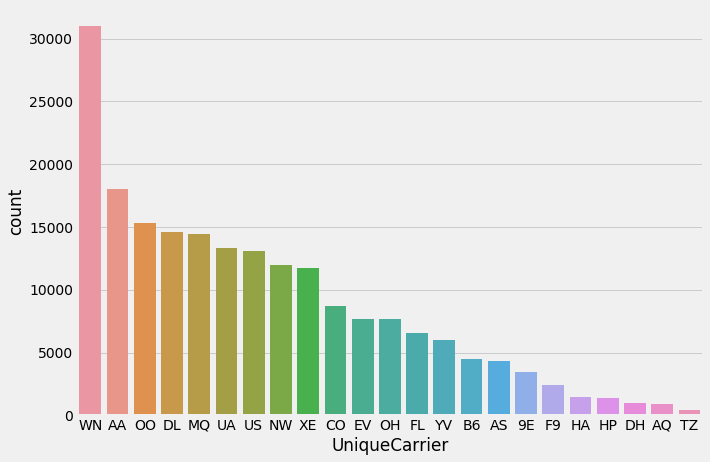

In [175]:
plt.figure(figsize=(10, 7))
sns.countplot(x='UniqueCarrier', data=data, order=data['UniqueCarrier'].value_counts().index)

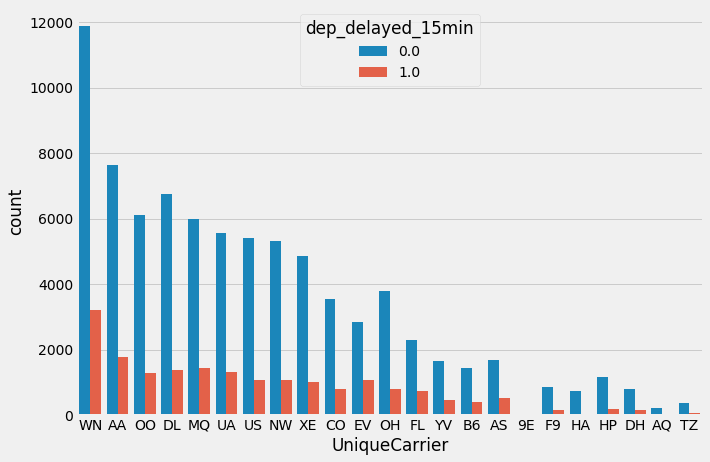

In [176]:
plt.figure(figsize=(10, 7))
sns.countplot(x='UniqueCarrier', data=data, hue = 'dep_delayed_15min', order=data['UniqueCarrier'].value_counts().index)

In [81]:
data = pd.get_dummies(data=data, columns=['UniqueCarrier'])

# Distance

In [82]:
data['Distance'].head()

0    732
1    834
2    416
3    872
4    423
Name: Distance, dtype: int64

In [83]:
data['Distance'].dtypes

dtype('int64')

In [117]:
data['Distance'].describe()

count    200000.000000
mean        726.263635
std         568.955768
min          30.000000
25%         319.000000
50%         575.000000
75%         954.000000
max        4962.000000
Name: Distance, dtype: float64

## normal distribution

((array([-4.49578239, -4.30333035, -4.19887063, ...,  4.19887063,
          4.30333035,  4.49578239]),
  array([  30,   31,   31, ..., 4962, 4962, 4962], dtype=int64)),
 (523.8220476040001, 726.263635, 0.9206536978060758))

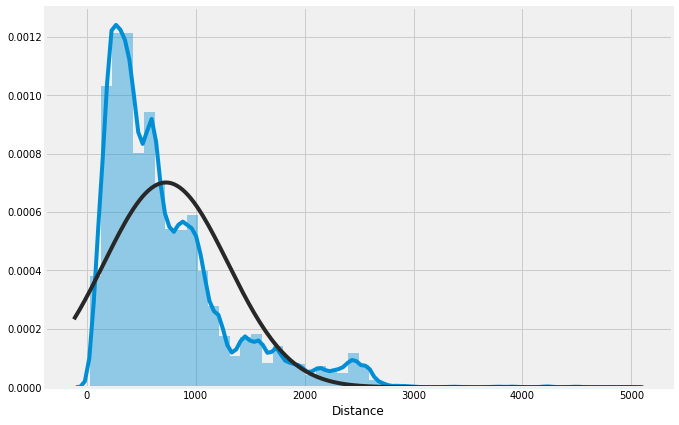

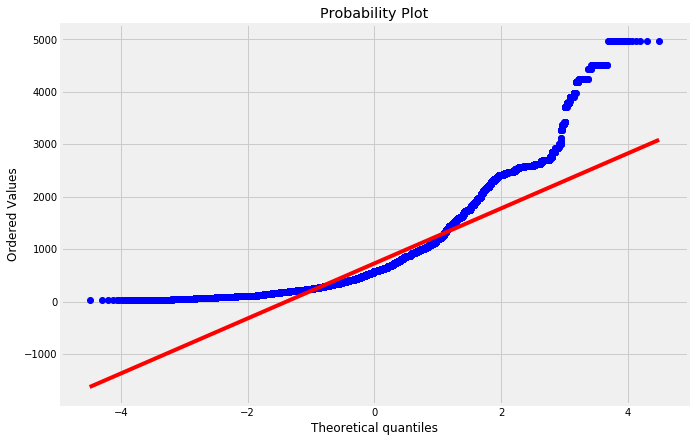

In [94]:
plt.figure(figsize=(10, 7))
sns.distplot(data['Distance'], fit=stats.norm)
plt.figure(figsize=(10, 7))
stats.probplot(data['Distance'], plot=plt)

## lognorm

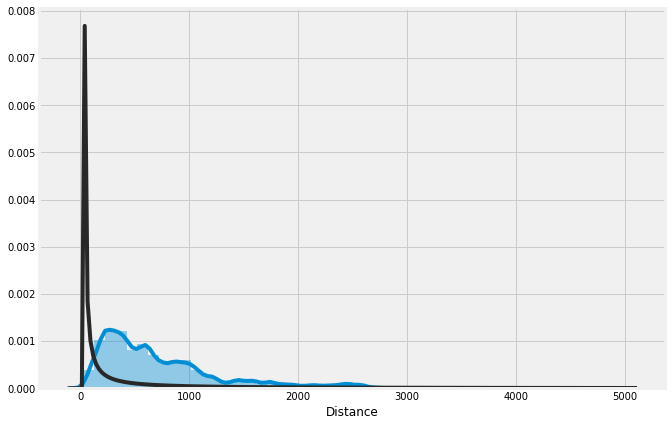

In [101]:
plt.figure(figsize=(10, 7))
sns.distplot(data['Distance'], fit=stats.lognorm)

((array([-4.49578239, -4.30333035, -4.19887063, ...,  4.19887063,
          4.30333035,  4.49578239]),
  array([3.40119738, 3.4339872 , 3.4339872 , ..., 8.50956416, 8.50956416,
         8.50956416])),
 (0.778142067347109, 6.3019328715156675, 0.9972156949120073))

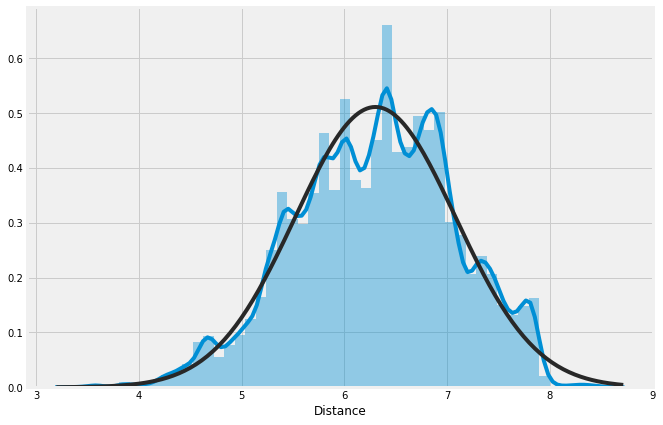

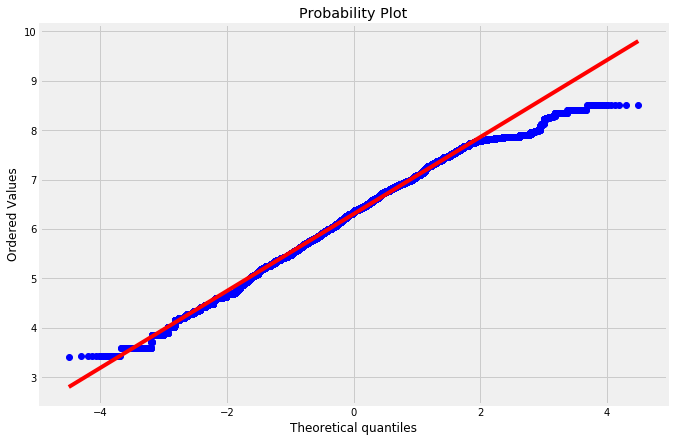

In [103]:
plt.figure(figsize=(10, 7))
sns.distplot(np.log(data['Distance']), fit=stats.norm)
plt.figure(figsize=(10, 7))
stats.probplot(np.log(data['Distance']), plot=plt)

## expon

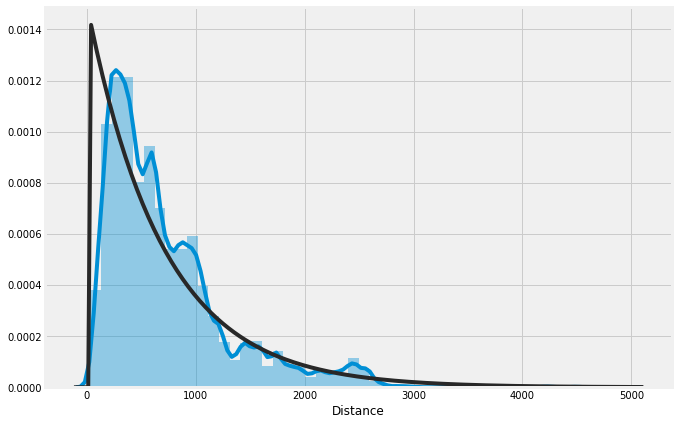

In [102]:
plt.figure(figsize=(10, 7))
sns.distplot(data['Distance'], fit=stats.expon)

In [86]:
cdf = thinkstats2.Cdf(data['Distance'])

{'xscale': 'linear', 'yscale': 'linear'}

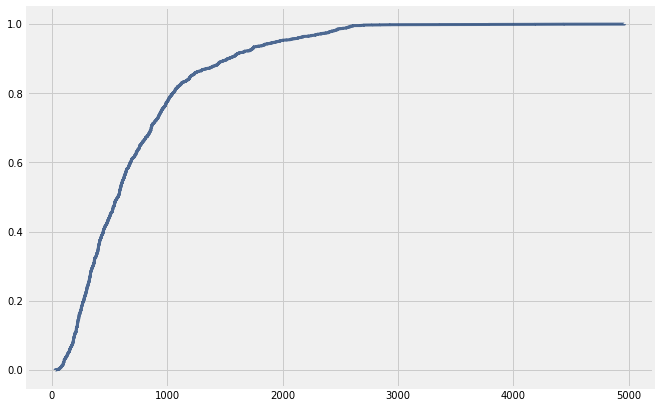

In [88]:
plt.figure(figsize=(10, 7))
thinkplot.Cdf(cdf)

No handles with labels found to put in legend.


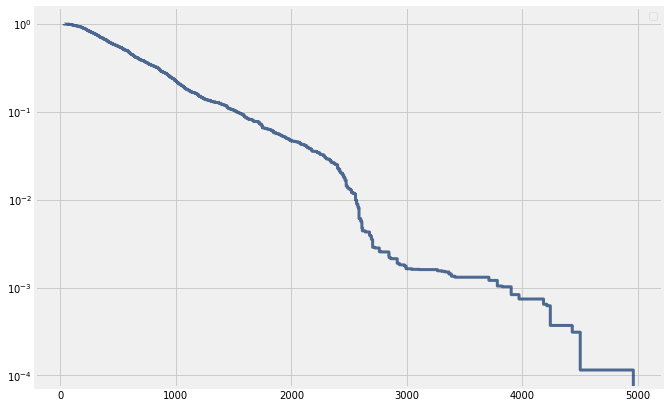

In [91]:
plt.figure(figsize=(10, 7))
thinkplot.Cdf(cdf, complement=True)
thinkplot.Config(yscale='log', loc='upper right')

## pareto

C:\Users\Dindar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Dindar\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


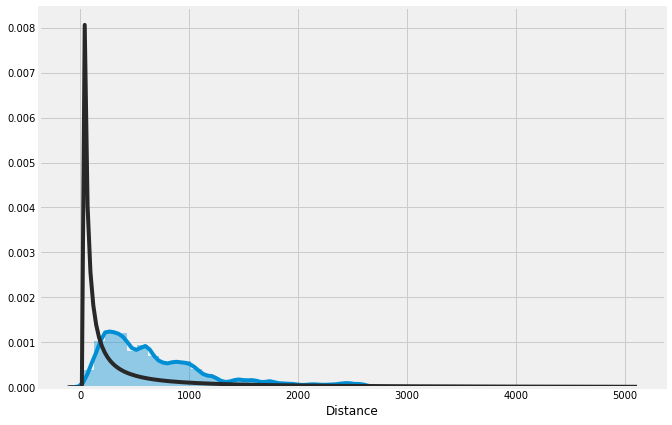

In [104]:
plt.figure(figsize=(10, 7))
sns.distplot(data['Distance'], fit=stats.pareto)

In [134]:
data['Distance'] = np.log(data['Distance'])

# cdf

In [135]:
pdf = thinkstats2.EstimatedPdf(data['Distance'])

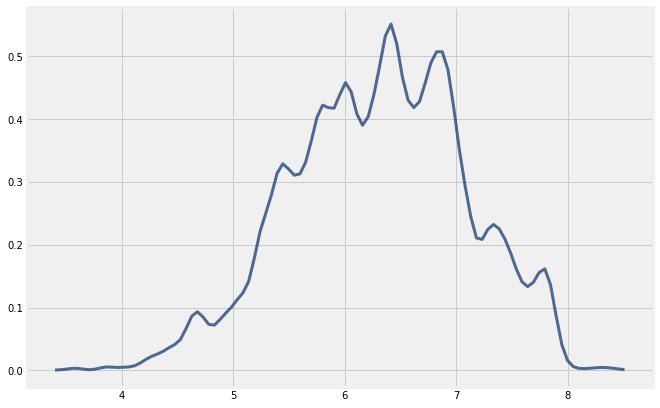

In [136]:
plt.figure(figsize=(10, 7))
thinkplot.Pdf(pdf)

In [137]:
yes_cdf = thinkstats2.Cdf(data[data['dep_delayed_15min'] == 1.0]['Distance'], label='1')
no_cdf = thinkstats2.Cdf(data[data['dep_delayed_15min'] == 0.0]['Distance'],  label='0')

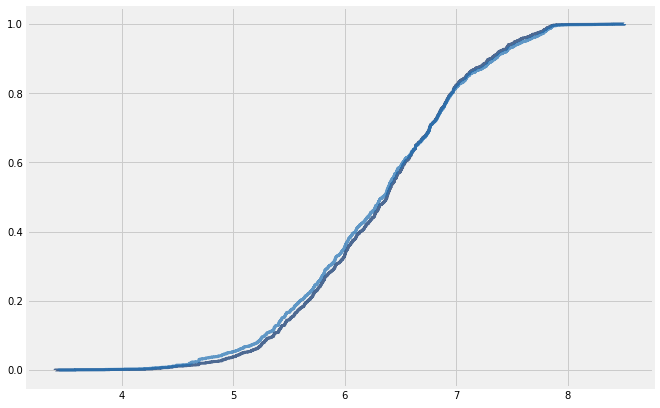

In [138]:
plt.figure(figsize=(10, 7))
thinkplot.Cdfs([yes_cdf, no_cdf])

# split

In [162]:
x = data.drop('dep_delayed_15min', axis = 1)

In [ ]:
y = data['dep_delayed_15min']

In [163]:
x = x[:100000]

# y

0.0    0.80956
1.0    0.19044
Name: dep_delayed_15min, dtype: float64


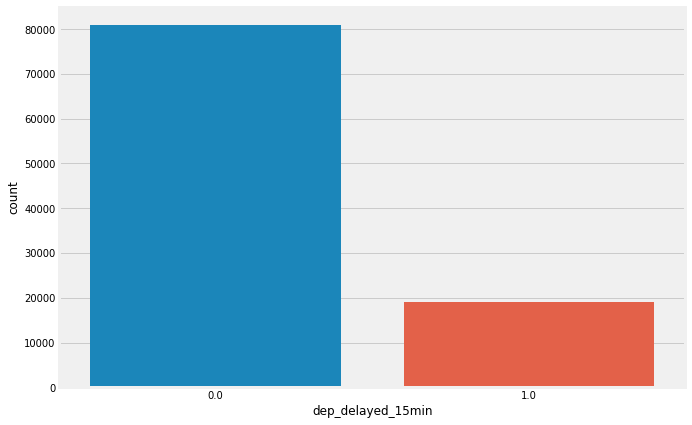

In [62]:
plt.figure(figsize=(10,7))
print(y.value_counts(normalize=True))
sns.countplot(y)

In [63]:
x.describe()

,Distance,weekend,weekdays,week_sin,week_cos,day_sin,day_cos,time_sin,time_cos,Dest_ABE,...,UniqueCarrier_MQ,UniqueCarrier_NW,UniqueCarrier_OH,UniqueCarrier_OO,UniqueCarrier_TZ,UniqueCarrier_UA,UniqueCarrier_US,UniqueCarrier_WN,UniqueCarrier_XE,UniqueCarrier_YV
count,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.000000,1.000000e+05,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,6.303921,0.269260,0.730740,1.209790e-02,-0.016797,5.004732e-06,-0.019499,-0.198656,-3.449875e-01,0.000710,...,0.074430,0.064030,0.045940,0.073900,0.004460,0.068760,0.064820,0.150820,0.059010,0.021280
std,0.782732,0.443578,0.443578,7.074647e-01,0.706452,7.138641e-01,0.700020,0.697620,5.956962e-01,0.026636,...,0.262471,0.244808,0.209356,0.261609,0.066634,0.253047,0.246209,0.357875,0.235645,0.144317
min,3.401197,0.000000,0.000000,-9.749279e-01,-0.900969,-9.987165e-01,-0.994869,-1.000000,-1.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.758902,0.000000,0.000000,-7.818315e-01,-0.900969,-7.247928e-01,-0.758758,-0.866025,-8.660254e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.354370,0.000000,1.000000,-2.449294e-16,-0.222521,-2.449294e-16,-0.050649,-0.500000,-5.000000e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.863803,1.000000,1.000000,7.818315e-01,0.623490,7.247928e-01,0.688967,0.500000,-1.836970e-16,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.509564,1.000000,1.000000,9.749279e-01,1.000000,9.987165e-01,1.000000,1.000000,1.000000e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [164]:
x = (x - x.mean()) / (x.std()) 

In [201]:
x.var().describe()

count    1.330000e+02
mean     1.000000e+00
std      7.603989e-13
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
dtype: float64

In [165]:
a = []
for i in x.columns:
    if x[i].isnull().sum() > 0:
        a.append(i)

In [198]:
a = []
b = x.var().mean()
for i in x.columns:
    if x[i].var() < b:
        a.append(i)

In [200]:
x = x.drop(a, axis=1)

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy is:  0.8080333333333334


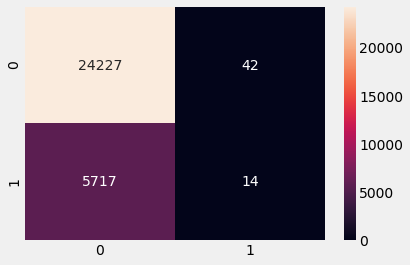

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y[:100000], test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

In [208]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# find best scored 5 features
select_feature = SelectKBest(f_classif, k=5).fit(x_train, y_train)

In [209]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [ 4.42265091e+00  2.85873671e+00  1.55456018e+00  1.60589050e+01
  5.29489035e-03  8.14043348e+00  1.24645695e+00  2.96831670e-03
  6.09612417e-02  8.89721113e-01  1.26251307e+01  2.49302952e+00
  8.28893054e-01  7.99874438e-01  9.44888953e-01  1.09128977e+01
  1.02134367e-01  1.28223198e+00  2.11393445e+00  2.58378883e+00
  6.29370061e+01  2.92461001e+00  1.05165745e+01  1.97143390e+00
  7.62087086e-01  4.62603740e-01  4.05584311e+01  1.45583000e-01
  1.56400054e-02  1.88757034e-01  2.96132632e+00  3.84263936e+00
  3.72677450e+00 -6.98931603e+00  4.05091462e-01  1.02284360e-01
  4.22840729e+00  7.83084906e-01  4.35331510e+00  5.13362404e-02
  6.61952929e+00  5.70925504e-02  1.47484130e+01  6.25466055e-03
  1.19756282e+00  3.98258399e-02  8.45925392e-01  8.19844814e+00
  1.92368161e-01  3.74307813e-04  7.68139885e-01  2.45990101e+00
  4.96587991e+00  9.38266153e-03  5.10532815e-02  4.01239442e-02
  2.77066745e+00  1.64411322e+00  7.08634241e-01  2.13820675e+00
  9.69506143e

Accuracy is:  0.8089666666666666


C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


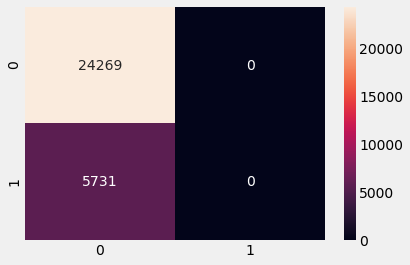

In [210]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d")

In [211]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

In [212]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['Dest_EWR', 'Dest_IAH', 'Origin_EWR', 'Origin_ORD', 'Origin_SLC'], dtype='object')


In [213]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:2

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [214]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 1
Best features : Index(['Origin_ORD'], dtype='object')


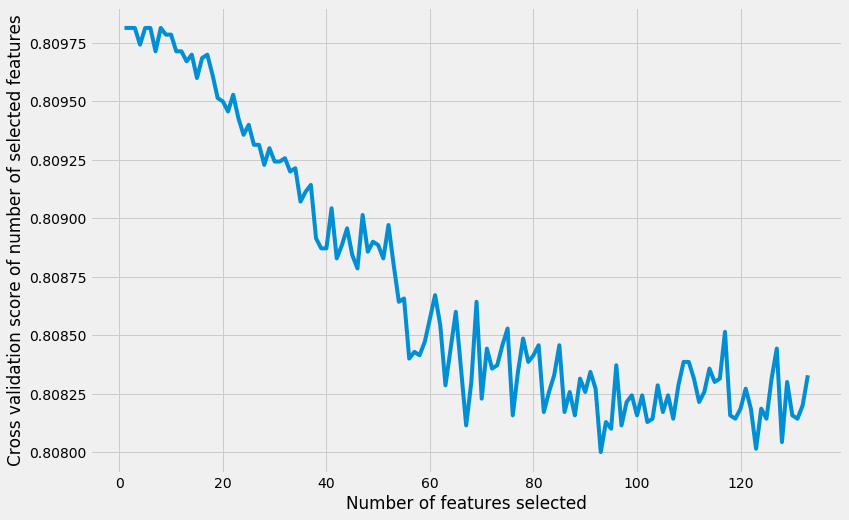

In [232]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 109 (0.065925)
2. feature 132 (0.051152)
3. feature 20 (0.042355)
4. feature 40 (0.026888)
5. feature 26 (0.023897)
6. feature 93 (0.023893)
7. feature 86 (0.023821)
8. feature 98 (0.021158)
9. feature 94 (0.019998)
10. feature 112 (0.018953)
11. feature 82 (0.018186)
12. feature 72 (0.018155)
13. feature 122 (0.018027)
14. feature 42 (0.017755)
15. feature 35 (0.017733)
16. feature 31 (0.017280)
17. feature 107 (0.016059)
18. feature 25 (0.014753)
19. feature 8 (0.014170)
20. feature 78 (0.014056)
21. feature 4 (0.013839)
22. feature 110 (0.013468)
23. feature 88 (0.013419)
24. feature 3 (0.013246)
25. feature 46 (0.012643)
26. feature 22 (0.012094)
27. feature 60 (0.012028)
28. feature 15 (0.011728)
29. feature 121 (0.011480)
30. feature 108 (0.011415)
31. feature 10 (0.010414)
32. feature 47 (0.010204)
33. feature 38 (0.009713)
34. feature 67 (0.009703)
35. feature 65 (0.009374)
36. feature 41 (0.009342)
37. feature 48 (0.009125)
38. feature 81 (0.009062)

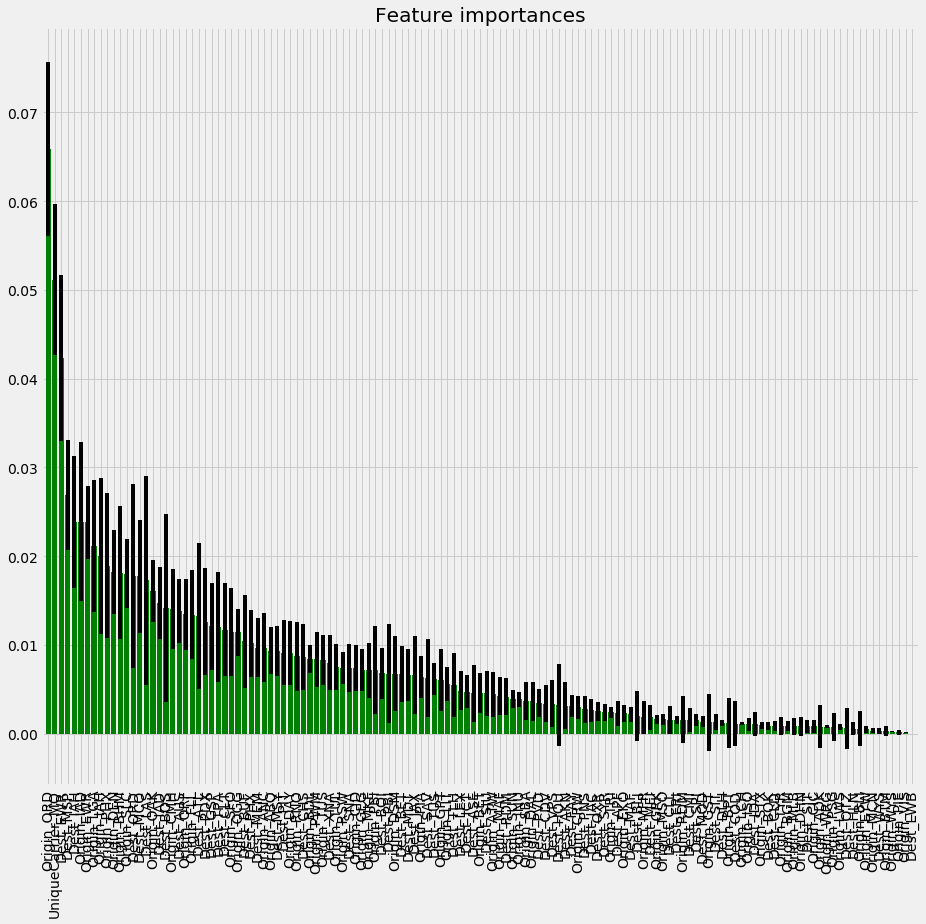

In [216]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

In [ ]:
'Dest_EWR', 'Dest_IAH', 'Origin_EWR', 'Origin_ORD', 'Origin_SLC'

In [220]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y[:100000], test_size=0.3, random_state=42)

In [230]:
x_train.columns[indices]

Index(['Origin_ORD', 'UniqueCarrier_MQ', 'Dest_EWR', 'Dest_MSP', 'Dest_IAH',
       'Origin_IAD', 'Origin_EWR', 'Origin_LGA', 'Origin_IAH', 'Origin_PHX',
       ...
       'Dest_HLN', 'Origin_BLI', 'Origin_EYW', 'Origin_MCN', 'Dest_WYS',
       'Origin_BTM', 'Origin_WYS', 'Origin_PIE', 'Origin_VIS', 'Dest_LWB'],
      dtype='object', length=133)

Text(0, 0.5, 'explained_variance_ratio_')

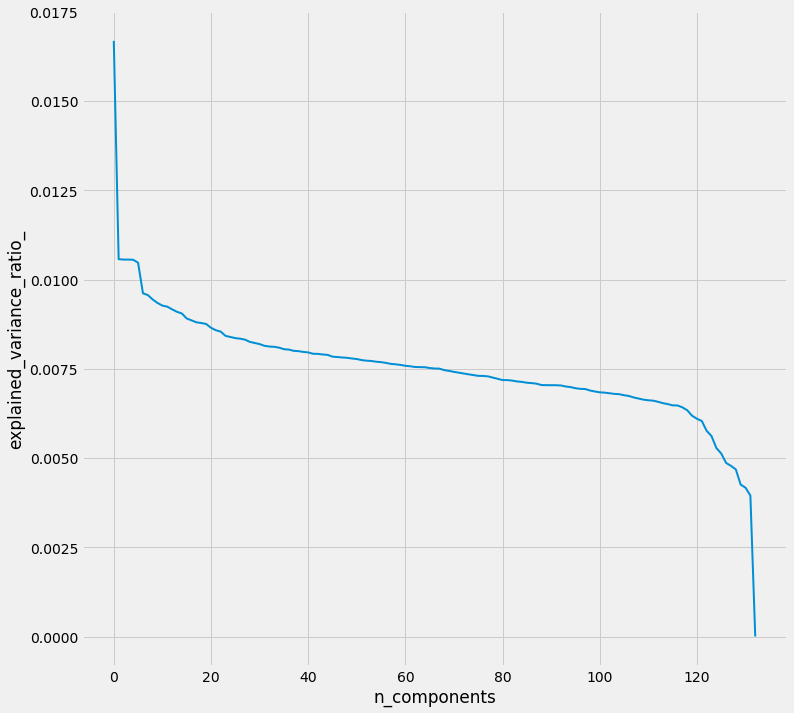

In [224]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train)

plt.figure(1, figsize=(14, 13))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [286]:
xx = data[['Origin_ORD', 'UniqueCarrier_MQ', 'Dest_EWR']]

In [287]:
y = y[:100000]

# ----------------------------------------------------------------------------

# Split 

In [154]:
X = data.drop('dep_delayed_15min', axis=1)
y = data['dep_delayed_15min'][:100000]

In [154]:
inputs = data[:100000]
test = data[10000:]

In [155]:
X = inputs.drop('dep_delayed_15min', axis=1)
y = inputs['dep_delayed_15min']

In [288]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(xx, y, test_size=0.3, random_state=42)

# select kbest

In [87]:
data[data['week_sin'] < 0]['week_sin'].any()

True

In [156]:
minus = []
for i in X.columns:
    if X[X[i] < 0][i].any() == True:
        minus.append(i)

In [157]:
plus = []
for i in X.columns:
    if X[X[i] < 0][i].any() == False:
        plus.append(i)

In [158]:
XX = X[minus]

In [115]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [159]:
X_new=SelectKBest(score_func=chi2,k=45).fit_transform(X[plus],y)

In [165]:
mask = X_new.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, X[plus].columns):
    if bool:
        new_features.append(feature)

In [167]:
new_features  = new_features + minus

In [170]:
train = X[new_features]
test = X[new_features]

In [160]:
X = pd.merge(pd.DataFrame(X_new), XX, left_index=True, right_index=True)

# model
best 45
[:30000]

In [ ]:
data.dtypes

In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

In [289]:
lr=LogisticRegression()

In [53]:
%%time
cross_val_score(lr, X, y, cv=5).mean()

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Wall time: 3.06 s


0.8096800028095

In [290]:
lr.fit(X_train, y_train)

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Expected 2D array, got 1D array instead:
array=[-0.2262578 -0.2262578 -0.2262578 ... -0.2262578 -0.2262578 -0.2262578].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [276]:
lr.score(X_test, y_test)

0.8089666666666666

In [241]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# extra trees
best 45
[:30000]

In [277]:
%%time
extra = ExtraTreesClassifier()
extra = extra.fit(X_train,y_train)

Wall time: 105 ms


C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [278]:
extra.score(X_test, y_test)

0.8089666666666666

# bagging with xgb
best 45
[:30000]

In [171]:


parameters = {'max_features': [2, 4, 7, 9], 'max_samples': [0.5, 0.7, 0.9], 
              "base_estimator__C": [0.0001, 0.001, 0.01, 1, 10]}

In [172]:
%%time
bg = BaggingClassifier(XGBClassifier(),
                       n_estimators=100, n_jobs=-1, random_state=42)

Wall time: 0 ns


In [173]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [174]:
r_grid_search = GridSearchCV(bg, parameters, cv=skf)

In [175]:
%%time
r_grid_search = r_grid_search.fit(X_train, y_train)

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: 

In [131]:
r_grid_search.score(X_test, y_test)

0.7976666666666666

In [132]:
r_grid_search.best_estimator_

BaggingClassifier(base_estimator=XGBClassifier(C=0.0001, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
         bootstrap=True, bootstrap_features=False, max_features=9,
         max_samples=0.7, n_estimators=100, n_jobs=-1, oob_score=False,
         random_state=42, verbose=0, warm_start=False)

In [244]:
bb = BaggingClassifier(base_estimator=XGBClassifier(C=0.0001, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
         bootstrap=True, bootstrap_features=False, max_features=9,
         max_samples=0.7, n_estimators=100, n_jobs=-1, oob_score=False,

                       random_state=42, verbose=0, warm_start=False)

In [245]:
%%time
bb.fit(X_train, y_train)

ValueError: max_features must be in (0, n_features]

In [178]:
bb.score(X_test, y_test)

0.8082222222222222

# Voting classifier
best 45
[:30000]

In [279]:
%%time
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('RBF',SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('xgb',XGBClassifier()),
                                              ('svm',SVC(kernel='linear',probability=True)),
                                              ('ada',AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)),
                                              ('gbc',GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1))
                                             ], 
                       voting='soft').fit(X_train,y_train)

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Wall time: 7min 44s


In [280]:
ensemble_lin_rbf.score(X_test, y_test)

0.8089666666666666

In [247]:
ensemble_lin_rbf.score(X_test, y_test)

0.8089666666666666

In [180]:
ensemble_lin_rbf.score(X_test, y_test)

0.8153333333333334

# Ada boost classifier
best 45 [:30000]

In [281]:
%%time
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
ada.fit(X_train, y_train)

Wall time: 4.55 s


In [282]:
ada.score(X_test, y_test)

0.8089666666666666

# XGB
best 45 [:30000]

In [250]:
xgb = XGBClassifier()

In [251]:
%%time
xgb.fit(X_train, y_train)

Wall time: 2.58 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [252]:
xgb.score(X_test, y_test)

0.8089666666666666

# tuning parameters
best 45 [:30000]

In [186]:
model = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      n_estimators=100, 
                      reg_alpha = 0.3,
                      max_depth=4, 
                      gamma=10)

In [187]:
%%time
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]
model.fit(X_train, y_train)

Wall time: 3.09 s


In [188]:
model.score(X_test, y_test)

0.8082222222222222

# xgb tuning parameters
best 45 [:30000]

In [64]:
parameters = {'learning_rate' : [0.1, 0.01],
             'n_estimators':[50, 100],
             'max_depth' : [1, 3, 5, 9, 15, 19],
             'subsample' : [0.75, 0.8, 0.9, 1.0],
             'colsample_bytree' : [0.3, 0.4, 0.6, 0.8],
             'gamma' : [0.1, 5]}

In [65]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [68]:
r_grid_search = GridSearchCV(xgb, parameters, cv=skf)

In [69]:
%%time
r_grid_search.fit(X_train, y_train)
print('aaa')
r_grid_search.score(X_test, y_test)

aaa
Wall time: 47min 59s


In [70]:
r_grid_search.score(X_test, y_test)

0.802

In [71]:
r_grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=5,
       learning_rate=0.1, max_delta_step=0, max_depth=9,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1.0, verbosity=1)

In [253]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=5,
       learning_rate=0.1, max_delta_step=0, max_depth=9,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1.0, verbosity=1)

In [254]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=5,
       learning_rate=0.1, max_delta_step=0, max_depth=9,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1.0, verbosity=1)

In [255]:
xgb.score(X_test, y_test)

0.8089666666666666

# Gradient boosting classifier
best 45 [:30000]

In [256]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)

In [257]:
%%time
grad.fit(X_train, y_train)

Wall time: 6.47 s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [258]:
grad.score(X_test, y_test)

0.8089666666666666

# Random forest
best 45 [:30000]

In [283]:
rf = RandomForestClassifier()

In [284]:
%%time
rf.fit(X_train, y_train)

Wall time: 123 ms


C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [285]:
rf.score(X_test, y_test)

0.8089666666666666

# knn
best 45 [:30000]

In [262]:
knn = KNeighborsClassifier()

In [263]:
%%time
knn.fit(X_train, y_train)

Wall time: 6.14 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [264]:
%%time
knn.score(X_test, y_test)

Wall time: 23.1 s


0.8089666666666666

# svc
best 45 [:30000]

In [146]:
%%time
C=[0.05,0.1,0.2,0.4,0.6,0.7,1]
gamma=[0.1,0.3,0.5,0.6,0.8,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=SVC(),param_grid=hyper,verbose=True)
gd.fit(X_train, y_train)

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 84 candidates, totalling 252 fits


[Parallel(n_jobs=1)]: Done 252 out of 252 | elapsed:  5.1min finished


Wall time: 5min 10s


In [148]:
gd.score(X_test, y_test)

0.7996666666666666

In [149]:
gd.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [265]:
sss = SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [266]:
sss.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [267]:
sss.score(X_test, y_test)

0.8089666666666666

In [204]:
svc = SVC()

In [207]:
%%time
svc.fit(X_train, y_train)

C:\Users\Dindar\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wall time: 31.5 s


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [208]:
%%time
svc.score(X_test, y_test)

Wall time: 5.16 s


0.8082222222222222